In [1]:
da = read.table('ch2data/m-ibmsp6709.txt',header=TRUE)
ibm=da$ibm
sp5=da$sp
cor(sp5,ibm,method='spearman')

[1] 0.5860817

$kendall\_correlation: τ = P[(X 1 − X 2 )(Y 1 − Y 2 ) > 0] − P[(X 1 − X 2 )(Y 1 − Y 2 ) < 0]$

In [2]:
cor(sp5,ibm,method='kendall')

[1] 0.4196587

## Ljung–Box Test
$H_{0}: \rho_{1}=\rho_{2}=\cdots=\rho_{m}=0 \\ H_{\mathrm{a}}: \rho_{i} \neq 0 \text { for some } i \in\{1, \ldots, m\}$

In [3]:
lnibm=log(ibm+1)
Box.test(ibm,lag=12,type='Ljung')
Box.test(ibm,lag=24,type='Ljung')
Box.test(lnibm,lag=12,type='Ljung')
Box.test(lnibm,lag=24,type='Ljung')

# the Ljung–Box statistics cannot reject the null hypothesis of no serial correlations in the IBM stock returns.


	Box-Ljung test

data:  ibm
X-squared = 7.5666, df = 12, p-value = 0.818



	Box-Ljung test

data:  ibm
X-squared = 25.487, df = 24, p-value = 0.3797



	Box-Ljung test

data:  lnibm
X-squared = 7.4042, df = 12, p-value = 0.8298



	Box-Ljung test

data:  lnibm
X-squared = 25.39, df = 24, p-value = 0.3848


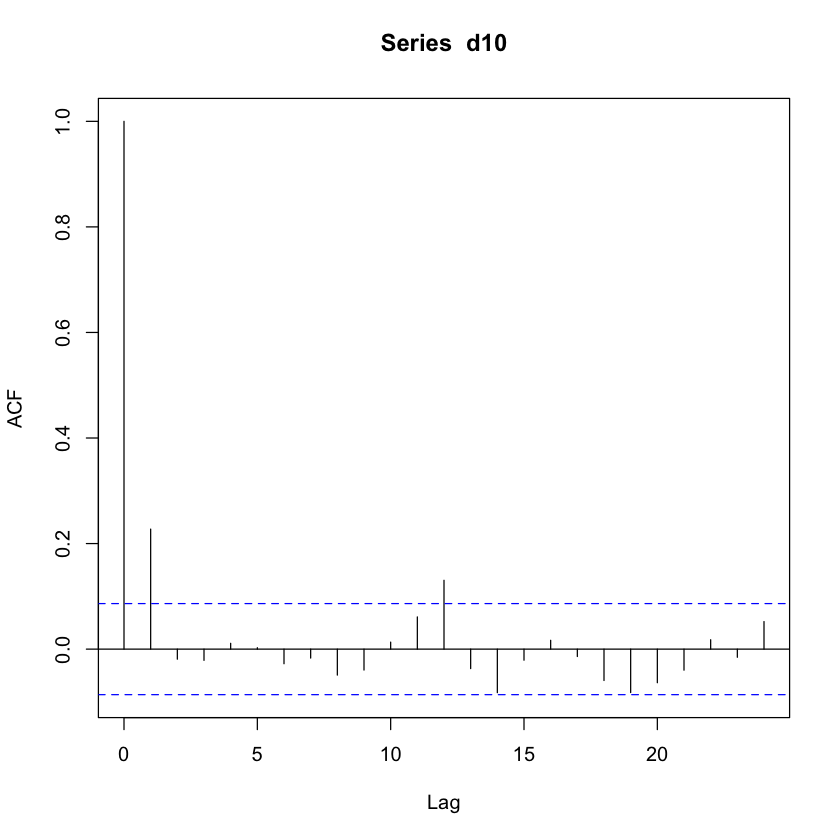

In [4]:
da=read.table("ch2data/m-dec12910.txt",header=T)
d10=da$dec10 # select the Decile 10 returns
dec10=ts(d10,frequency=12,start=c(1967,1))
f1 = acf(d10,lag=24) # command to obtain sample ACF of the data

# The plot clearly shows that the lag-1 ACF is signiﬁcantly different from 0 at the 5% level

In [5]:
f1$acf[13]*sqrt(516)

#t-ratio t = T ρˆ 12 = 2.96, which is greater than the 5% critical value 1.96. 
#Therefore, we reject the null hypothesis, that is, ρ 12 = 0 at the 5% signiﬁcance level. 
#In other words, the data conﬁrm the existence of January effect in small stock returns.

[1] 2.962369

# AR
$ x_{t}=\phi_{0}+\phi_{1} x_{t-1}+\cdots+\phi_{p} x_{t-p}+a_{t}$

$E\left(x_{t}\right)=\frac{\phi_{0}}{1-\phi_{1}-\cdots-\phi_{p}}\\
1-\phi_{1} z-\phi_{2} z^{2}-\cdots-\phi_{p} z^{p}=0$

If all the solutions of this equation are greater than 1 in modulus, then the series x t is stationary.

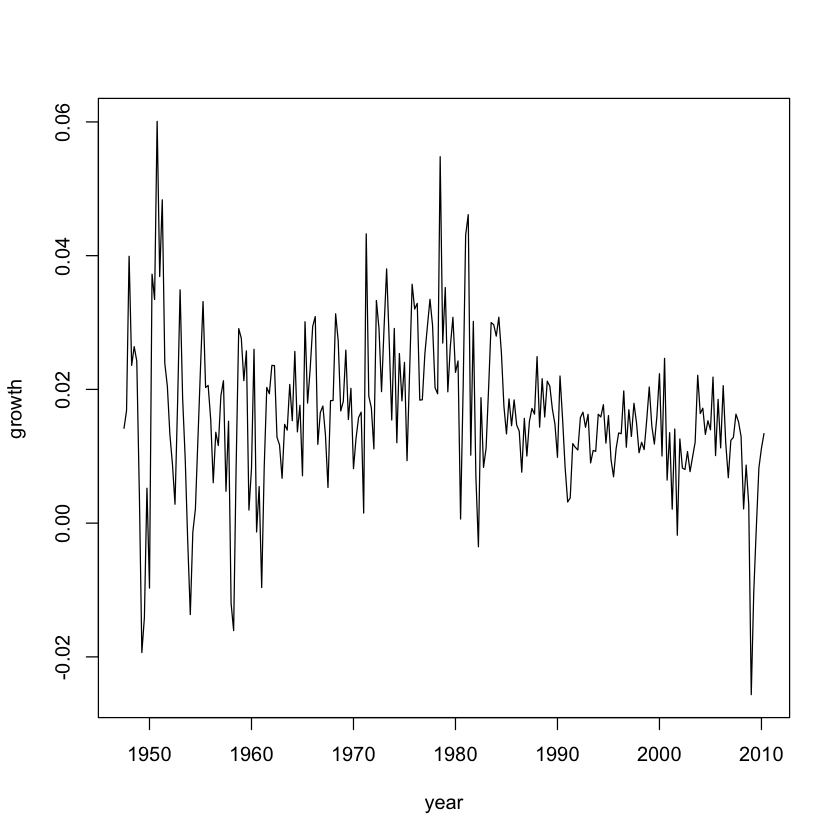

In [6]:
da=read.table("ch2data/q-gnp4710.txt",header=T)
gnp = diff(log(da$VALUE))
tdx=c(1:253)/4+1947

plot(tdx[2:253],gnp,type='l',xlab='year',ylab='growth')

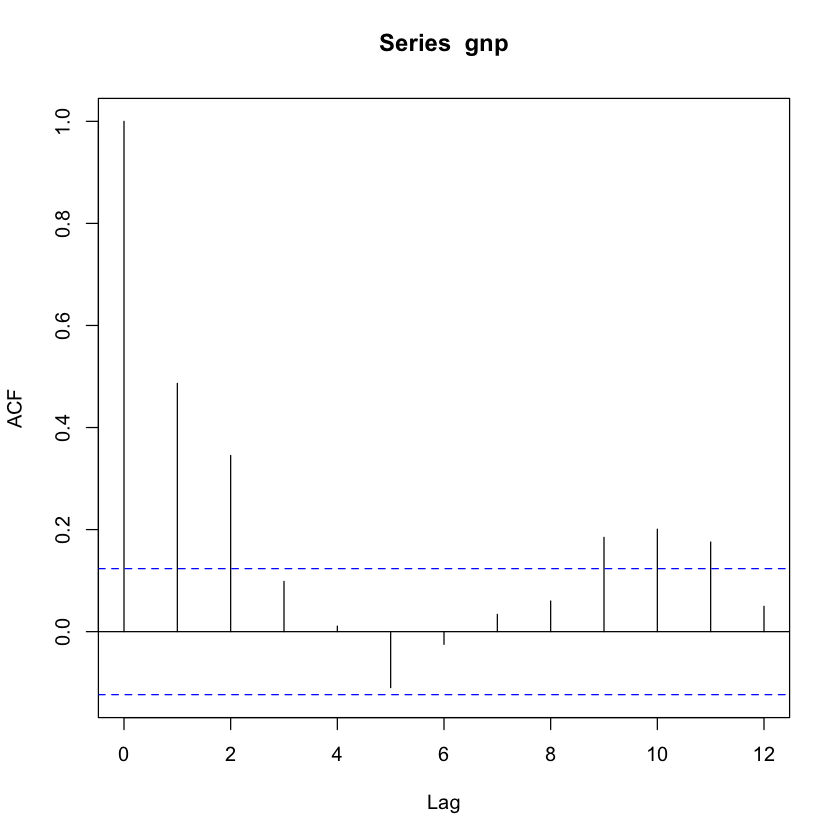

In [7]:
acf(gnp,lag=12)

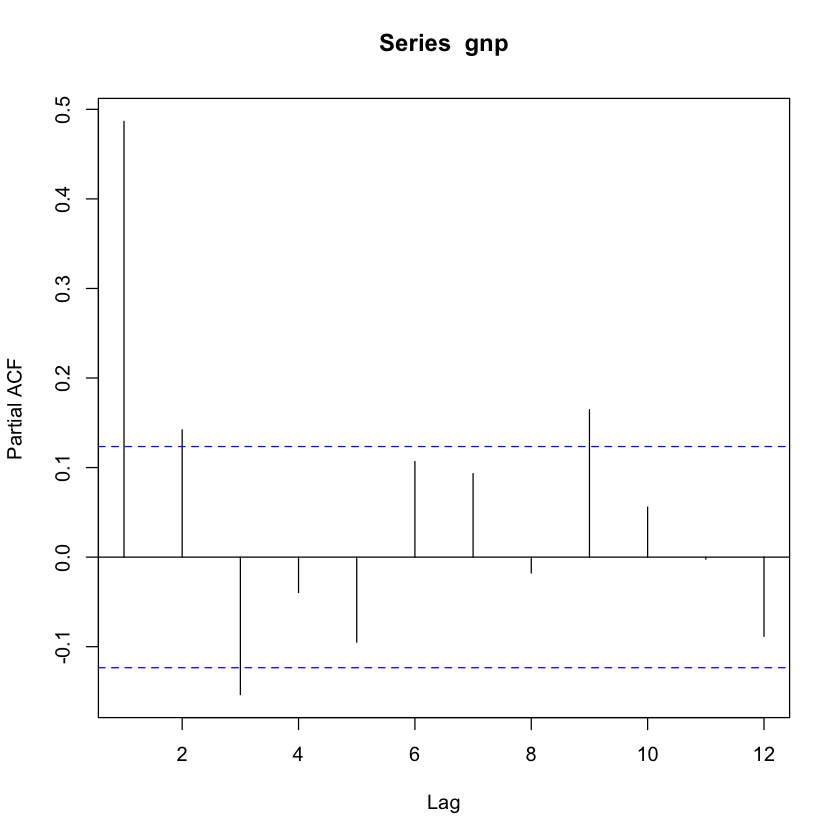

In [8]:
pacf(gnp,lag=12)

In [9]:
m1=arima(gnp,order=c(3,0,0))
m1


Call:
arima(x = gnp, order = c(3, 0, 0))

Coefficients:
         ar1     ar2      ar3  intercept
      0.4386  0.2063  -0.1559     0.0163
s.e.  0.0620  0.0666   0.0626     0.0012

sigma^2 estimated as 9.549e-05:  log likelihood = 808.56,  aic = -1607.12

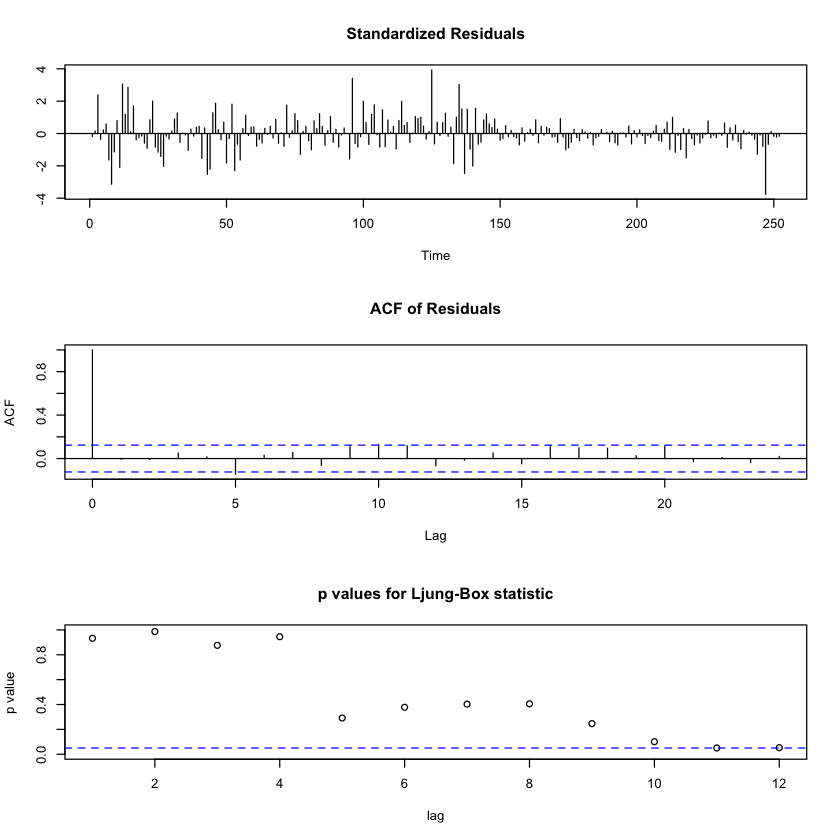

In [10]:
tsdiag(m1,gof=12)

In [11]:
p1=c(1,-m1$coef[1:3])
r1=polyroot(p1) # # solve the polynomial equation
r1 

[1]  1.616116+0.864212i -1.909216+0.000000i  1.616116-0.864212i

In [12]:
Mod(r1)

[1] 1.832674 1.909216 1.832674

In [13]:
2*pi/acos(1.616116/1.832674)

# Therefore, the ﬁtted AR(3) model conﬁrms the existence of business cycles in the US economy, 
# and the average length of the cycles is 12.8 quarters

[1] 12.79523

## Identifying the order p of an AR time series

$\begin{aligned}
&x_{t}=\phi_{0,1}+\phi_{1,1} x_{t-1}+e_{1 t}\\
&x_{t}=\phi_{0,2}+\phi_{1,2} x_{t-1}+\phi_{2,2} x_{t-2}+e_{2 t}
\end{aligned}\\
......$

From the definition, the lag- 2 PACF $\hat{\phi}_{2,2}$ shows the added contribution of $x_{t-2}$ to
$x_{t}$ over the $\mathrm{AR}(1)$ model $x_{t}=\phi_{0}+\phi_{1} x_{t-1}+e_{1 t}$

$
\begin{equation}
\mathrm{AIC}(\ell)=\ln \left(\tilde{\sigma}_{\ell}^{2}\right)+\frac{2 \ell}{T}
\end{equation}\\
\mathrm{BIC}(\ell)=\ln \left(\tilde{\sigma}_{\ell}^{2}\right)+\frac{\ell \ln (T)}{T}
$

where $\tilde{\sigma}_{\ell}^{2}$ is the maximum likelihood estimate of $\sigma_{a}^{2}$, which is the variance of $a_{t}$,T is the sample size

In [14]:
mm1=ar(gnp,method='mle')
mm1$order

[1] 9

In [15]:
print(mm1$aic,digits=3)

     0      1      2      3      4      5      6      7      8      9     10 
77.767 11.915  8.792  4.669  6.265  5.950  5.101  4.596  6.541  0.000  0.509 
    11     12 
 2.504  2.057 


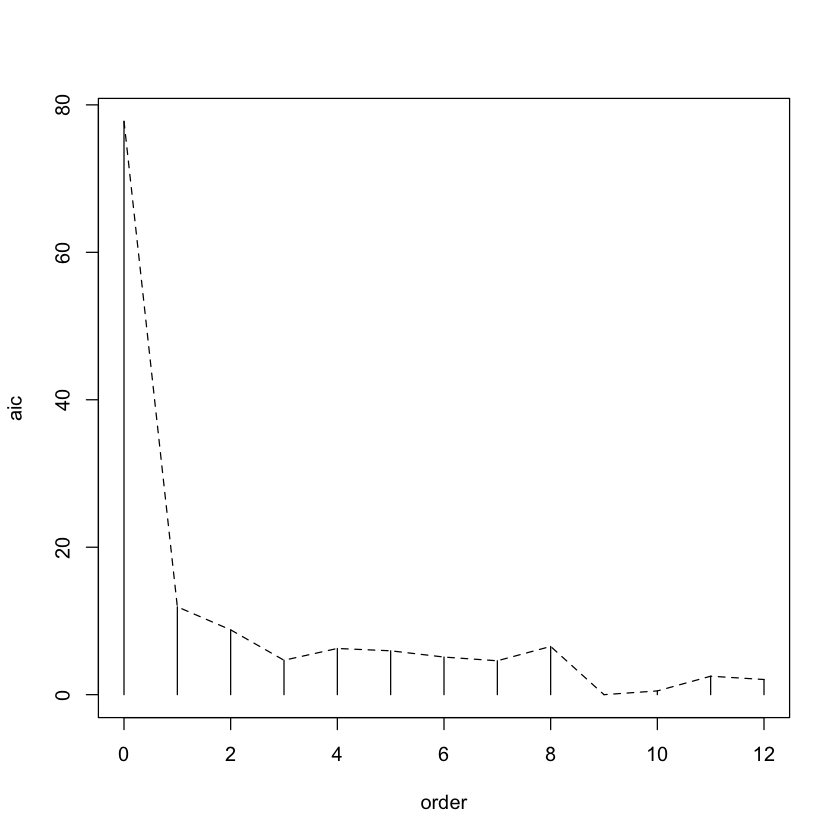

In [16]:
aic=mm1$aic
plot(c(0:12),aic,type='h',xlab='order',ylab='aic')
lines(0:12,aic,lty=2)

In [17]:
vw=read.table('ch2data/m-ibm3dx2608.txt',header=T)[,3]
m3=arima(vw,order=c(3,0,0))
m3
Box.test(m3$residuals,lag=12,type='Ljung')
1-pchisq(16.35,9)

# Thus, the null hypothesis of no residual serial correlation in the ﬁrst 12 lags is barely not rejected at the 5% level.
# the lag-2 AR coefﬁcient is not signiﬁcant at the 5% level


Call:
arima(x = vw, order = c(3, 0, 0))

Coefficients:
         ar1      ar2      ar3  intercept
      0.1158  -0.0187  -0.1042     0.0089
s.e.  0.0315   0.0317   0.0317     0.0017

sigma^2 estimated as 0.002875:  log likelihood = 1500.86,  aic = -2991.73


	Box-Ljung test

data:  m3$residuals
X-squared = 16.352, df = 12, p-value = 0.1756


[1] 0.05992276

In [18]:
m3=arima(vw,order=c(3,0,0),fixed=c(NA,0,NA,NA),transform.pars = FALSE)
m3
Box.test(m3$residuals,lag=12,type='Ljung')
1-pchisq(16.83,10)


Call:
arima(x = vw, order = c(3, 0, 0), transform.pars = FALSE, fixed = c(NA, 0, NA, 
    NA))

Coefficients:
         ar1  ar2      ar3  intercept
      0.1136    0  -0.1063     0.0089
s.e.  0.0313    0   0.0315     0.0017

sigma^2 estimated as 0.002876:  log likelihood = 1500.69,  aic = -2993.38


	Box-Ljung test

data:  m3$residuals
X-squared = 16.828, df = 12, p-value = 0.1562


[1] 0.07821131

- ***for MA models, ACF is useful in specifying the order because ACF cuts off at lag q for an MA(q) series;***
- ***for AR models, PACF is useful in order determination because PACF cuts off at lag p for an AR(p) process;***
- ***an MA series is always stationary, but for an AR series to be stationary, all of its characteristic roots must be less than 1 in modulus;***
- ***for a stationary series, the multistep ahead forecasts converge to the mean of the series and the variances of forecast errors converge to the variance of the series as the forecast horizon increases.***

In [19]:
da=read.table('ch2data/m-ibm3dx2608.txt',header=T)
ew=da$ewrtn
m1=arima(ew,order=c(0,0,9))
m1


Call:
arima(x = ew, order = c(0, 0, 9))

Coefficients:
         ma1     ma2      ma3      ma4     ma5      ma6     ma7      ma8
      0.2144  0.0374  -0.1203  -0.0425  0.0232  -0.0302  0.0482  -0.0276
s.e.  0.0316  0.0321   0.0328   0.0336  0.0319   0.0318  0.0364   0.0354
         ma9  intercept
      0.1350     0.0122
s.e.  0.0323     0.0028

sigma^2 estimated as 0.005043:  log likelihood = 1220.86,  aic = -2419.72

In [20]:
m1=arima(ew,order=c(0,0,9),fixed=c(NA,0,NA,0,0,0,0,0,NA,NA))
m1
Box.test(m1$residuals,lag=12,type='Ljung')
pv=1-pchisq(17.6,9)
pv # compute p-value after adjusting the d.f.


Call:
arima(x = ew, order = c(0, 0, 9), fixed = c(NA, 0, NA, 0, 0, 0, 0, 0, NA, NA))

Coefficients:
         ma1  ma2      ma3  ma4  ma5  ma6  ma7  ma8     ma9  intercept
      0.1909    0  -0.1199    0    0    0    0    0  0.1227     0.0122
s.e.  0.0293    0   0.0338    0    0    0    0    0  0.0312     0.0027

sigma^2 estimated as 0.005097:  log likelihood = 1215.61,  aic = -2421.22


	Box-Ljung test

data:  m1$residuals
X-squared = 17.604, df = 12, p-value = 0.1283


[1] 0.04010828

In [21]:
m1=arima(ew[1:986],order=c(0,0,9),fixed=c(NA,0,NA,0,0,0,0,0,NA,NA))
predict(m1,3)

$pred
Time Series:
Start = 987 
End = 989 
Frequency = 1 
[1] 0.004282626 0.013558874 0.015024191

$se
Time Series:
Start = 987 
End = 989 
Frequency = 1 
[1] 0.07117456 0.07237493 0.07237493

# ARMA

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12
0 o o x o o x o o o x o  x  o 
1 x o x o o x o o o o o  x  o 
2 x x x o o x o o o o o  o  o 
3 x x x o o o o o o o o  o  o 
4 x o x o o o o o o o o  o  o 
5 x x x o x o o o o o o  o  o 
6 x x x x x o o o o o o  o  o 


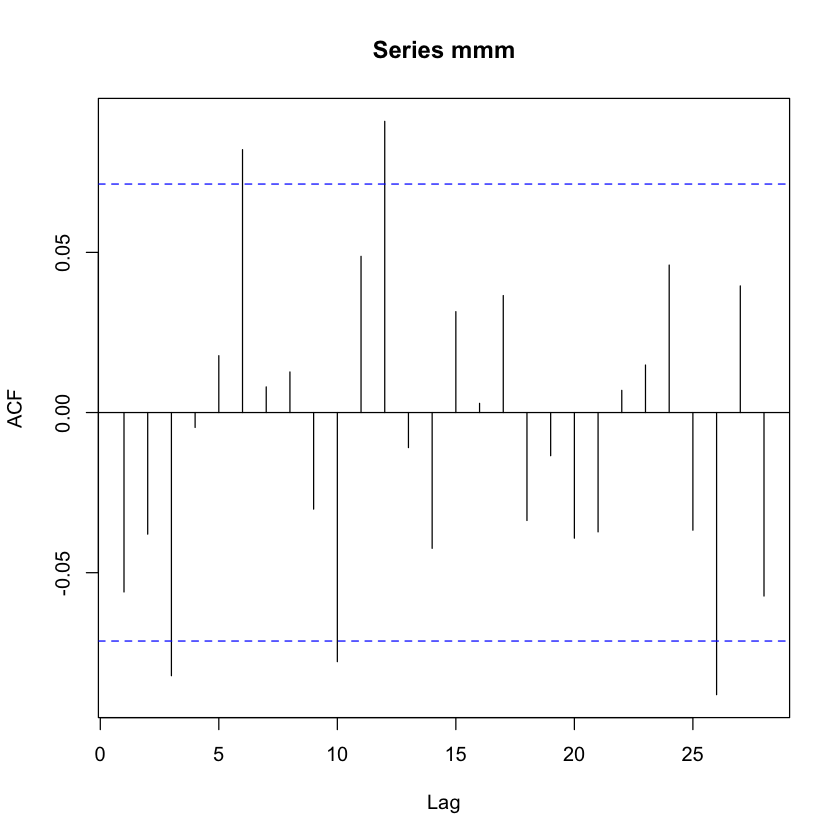

In [23]:
da=read.table('ch2data/m-3m4608.txt',header=T)
mmm=log(da$rtn+1)
library(TSA)
acf(mmm)
m1=eacf(mmm,6,12)

# Consequently, the EACF suggests that the monthly log returns of 3M stock follow an ARMA(0,0) model

# ARIMA

In [43]:
library(fUnitRoots)

In [42]:
da=read.table("ch2data/q-gdp4708.txt",header=T)
gdp=log(da[,4])
m1=ar(diff(gdp),method='mle')
m1$order
adfTest(gdp,lags=10,type=c("c"))
# With p = 10, ADF-test statistic is −1.611 with p-value 0.457, 
# indicating that the unit-root hypothesis cannot be rejected.

[1] 10


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 10
  STATISTIC:
    Dickey-Fuller: -1.6109
  P VALUE:
    0.4569 

Description:
 Wed Jan 22 23:10:50 2020 by user: 


# ARIMA SEASONAL

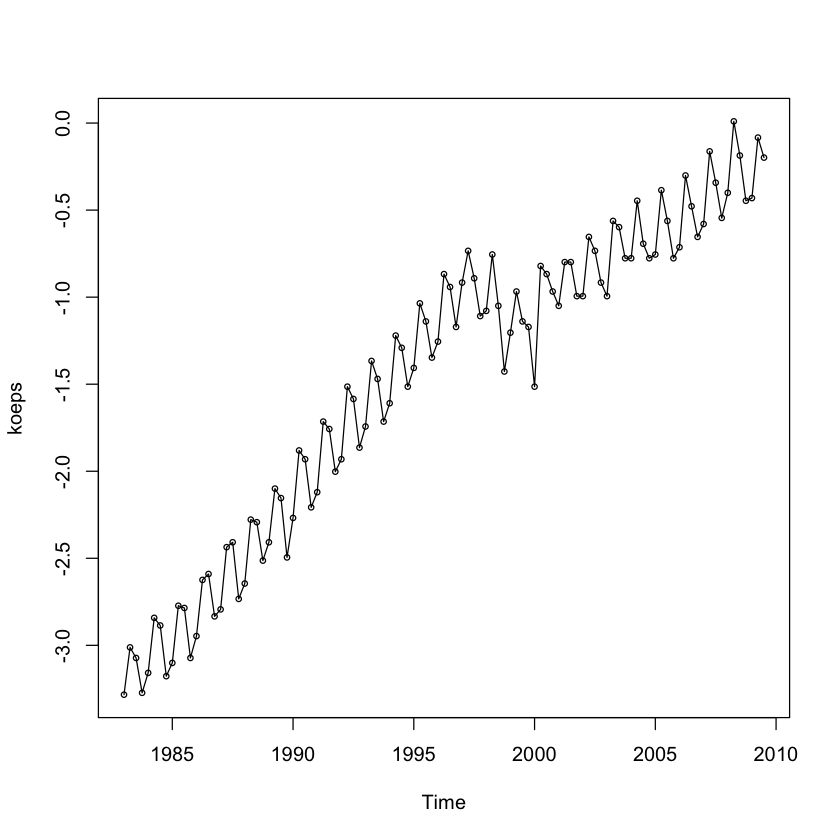

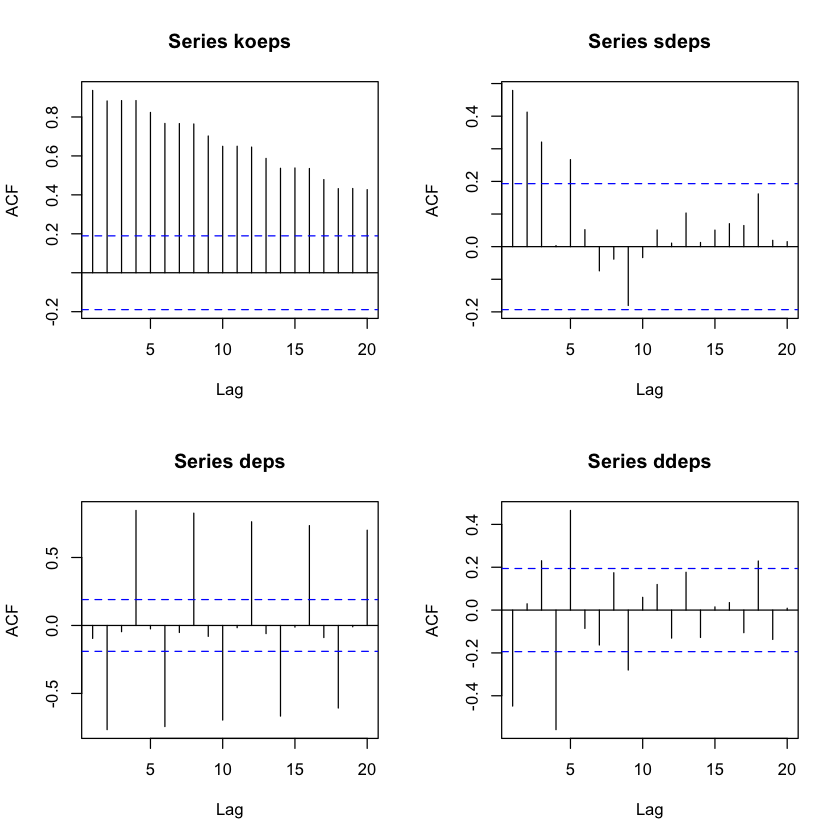

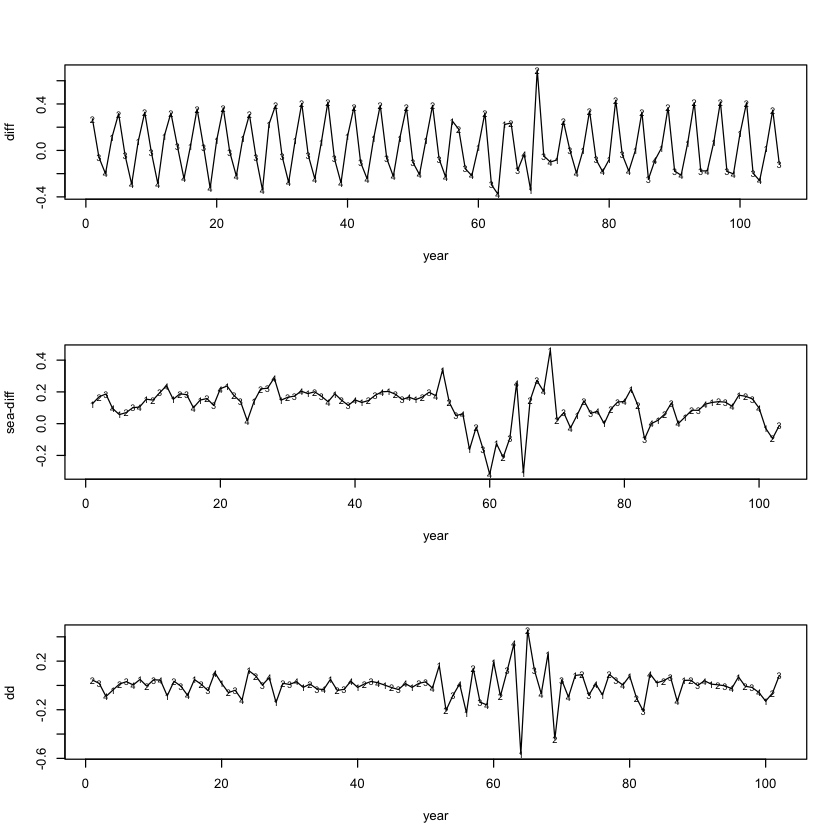

In [50]:
da=read.table("ch2data/q-ko-earns8309.txt",header=T)
eps=log(da$value)
koeps=ts(eps,frequency=4,start=c(1983,1))
plot(koeps,type='l')
points(koeps,cex=0.6) 
par(mfcol=c(2,2))
koeps=log(da$value)
deps=diff(koeps)
sdeps=diff(koeps,4)
ddeps=diff(sdeps)
acf(koeps,lag=20)
acf(deps,lag=20)
acf(sdeps,lag=20)
acf(ddeps,lag=20)
# Obtain time plots
c1=c("2","3","4","1")
c2=c("1","2","3","4")
par(mfcol=c(3,1))
plot(deps,xlab='year',ylab='diff',type='l')
points(deps,pch=c1,cex=0.7)
plot(sdeps,xlab='year',ylab='sea-diff',type='l')
points(sdeps,pch=c2,cex=0.7)
plot(ddeps,xlab='year',ylab='dd',type='l')
points(ddeps,pch=c1,cex=0.7) 


Call:
arima(x = koeps, order = c(0, 1, 1), seasonal = list(order = c(0, 1, 1), period = 4))

Coefficients:
          ma1     sma1
      -0.4096  -0.8203
s.e.   0.0866   0.0743

sigma^2 estimated as 0.00724:  log likelihood = 104.25,  aic = -204.5


	Box-Ljung test

data:  m1$residuals
X-squared = 13.303, df = 12, p-value = 0.3474


[1] 0.2073788

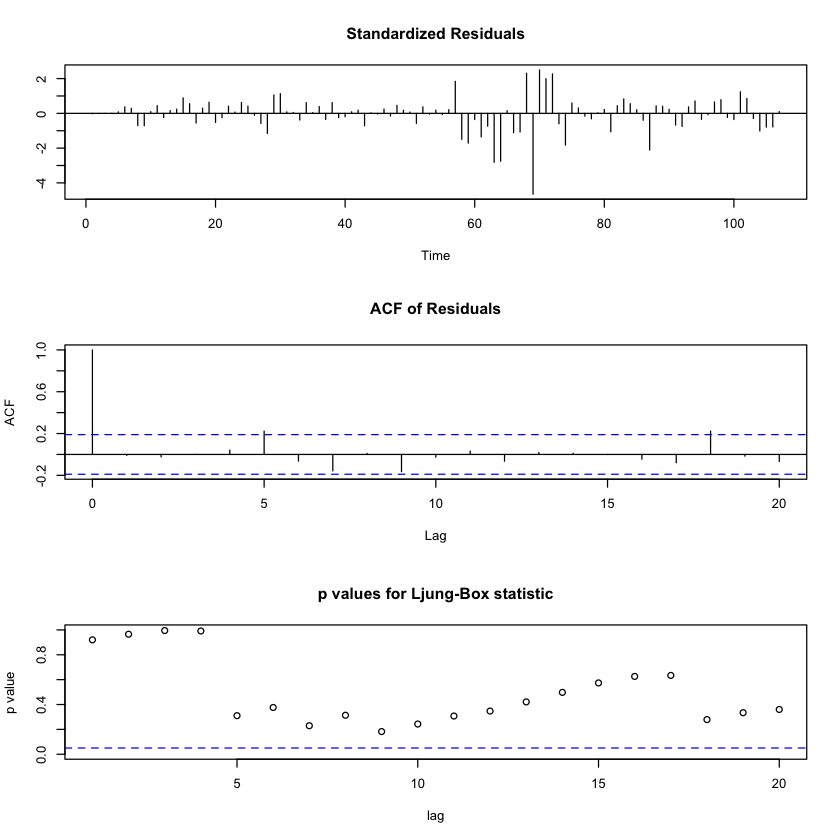

In [51]:
#  Estimation
m1=arima(koeps,order=c(0,1,1),seasonal=list(order=c(0,1,1),period=4))
m1
tsdiag(m1,gof=20)  # model checking
Box.test(m1$residuals,lag=12,type='Ljung')
pp=1-pchisq(13.30,10)
pp

In [56]:
y=koeps[1:100]
m1=arima(y,order=c(0,1,1),seasonal=list(order=c(0,1,1),period=4))
m1
pm1=predict(m1,7)


Call:
arima(x = y, order = c(0, 1, 1), seasonal = list(order = c(0, 1, 1), period = 4))

Coefficients:
          ma1     sma1
      -0.4209  -0.8099
s.e.   0.0874   0.0767

sigma^2 estimated as 0.007432:  log likelihood = 95.78,  aic = -187.57

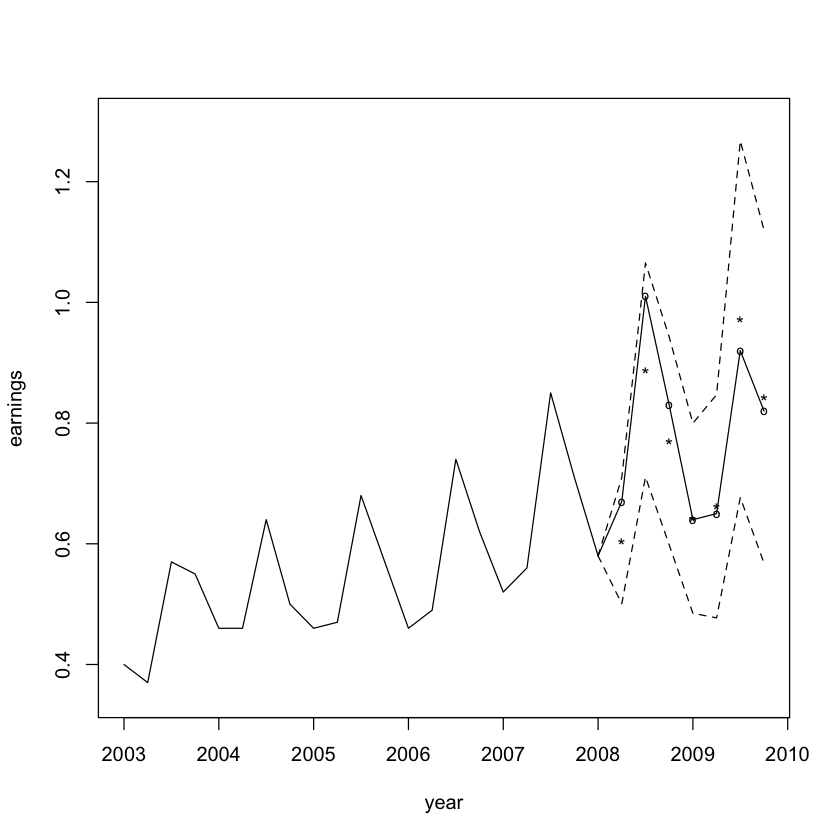

In [59]:
pred=pm1$pred
se=pm1$se
ko=da$value
fore=exp(pred+se^2/2)
v1=exp(2*pred+se^2)*(exp(se^2)-1)
s1=sqrt(v1)
eps=ko[80:107]

tdx=(c(1:28)+3)/4+2002
upp=c(ko[100],fore+2*s1)
low=c(ko[100],fore-2*s1)

plot(tdx,eps,xlab='year',ylab='earnings',type='l',ylim=c(0.35,1.3))
points(tdx[22:28],fore,pch='*')
lines(tdx[21:28],upp,lty=2)
lines(tdx[21:28],low,lty=2)
points(tdx[22:28],ko[101:107],pch='o',cex=0.7)

# Seasonal Dummy Variable


Call:
lm(formula = d1 ~ jan)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30861 -0.03475 -0.00176  0.03254  0.40671 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.002864   0.003333   0.859    0.391    
jan         0.125251   0.011546  10.848   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06904 on 466 degrees of freedom
Multiple R-squared:  0.2016,	Adjusted R-squared:  0.1999 
F-statistic: 117.7 on 1 and 466 DF,  p-value: < 2.2e-16


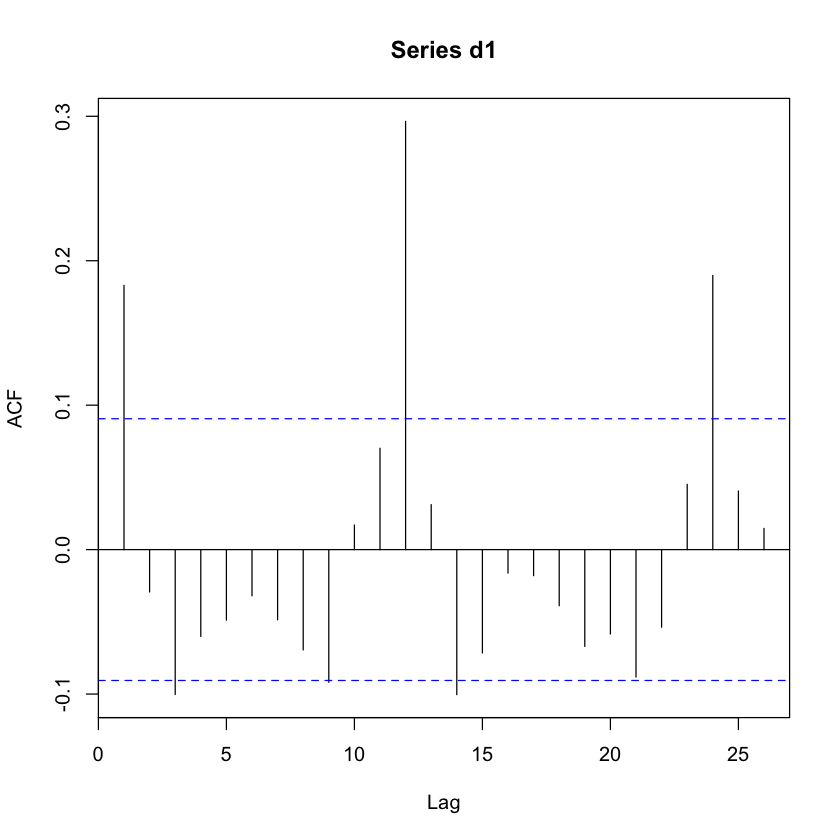

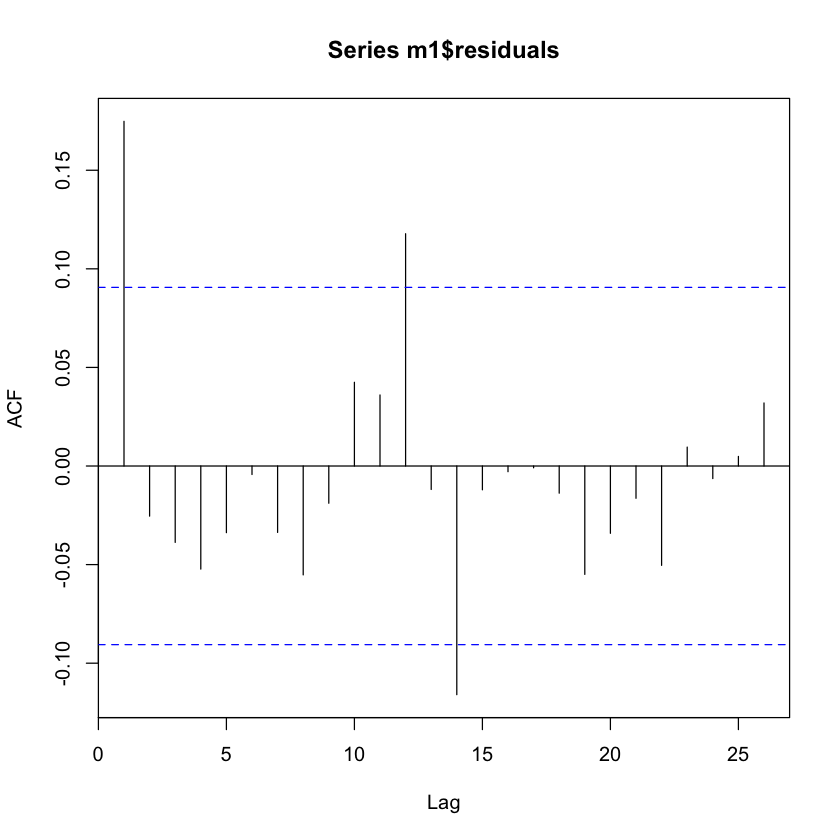

In [70]:
da=read.table("ch2data/m-deciles08.txt",header=T)
d1=da[,2]
acf(d1)
jan=rep(c(1,rep(0,11)),39) # Create January dummy.
m1=lm(d1~jan)
summary(m1)
acf(m1$residuals)
# From the sample ACF, serial correlations at lags 12, 24, and 36 largely disappear, 
# suggesting that the seasonal pattern of the Decile 1 returns has been successfully removed by the January dummy variable.


Call:
arima(x = d1, order = c(1, 0, 0), seasonal = list(order = c(1, 0, 1), period = 12))

Coefficients:
         ar1    sar1     sma1  intercept
      0.1769  0.9882  -0.9144     0.0118
s.e.  0.0456  0.0093   0.0335     0.0129

sigma^2 estimated as 0.004717:  log likelihood = 584.07,  aic = -1160.14


Call:
arima(x = d1, order = c(1, 0, 0), seasonal = list(order = c(1, 0, 1), period = 12), 
    include.mean = F)

Coefficients:
         ar1    sar1     sma1
      0.1787  0.9886  -0.9127
s.e.  0.0456  0.0089   0.0335

sigma^2 estimated as 0.00472:  log likelihood = 583.68,  aic = -1161.36

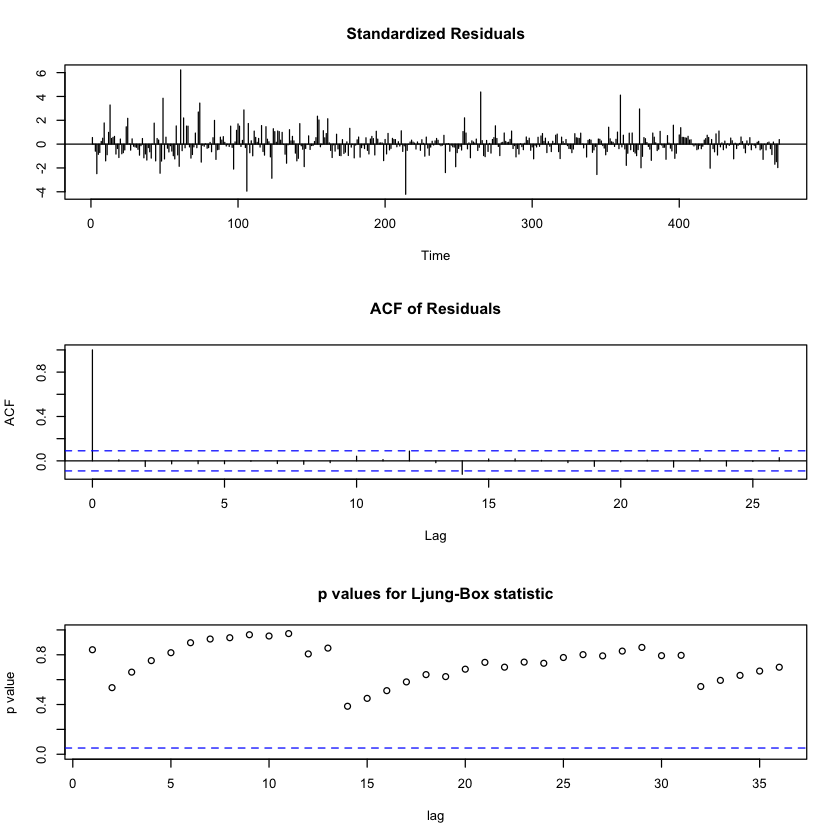

In [71]:
m2=arima(d1,order=c(1,0,0),seasonal=list(order=c(1,0,1),period=12))
m2
tsdiag(m2,gof=36) 
m2=arima(d1,order=c(1,0,0),seasonal=list(order=c(1,0,1), period=12),include.mean=F)
m2


Call:
lm(formula = r3 ~ r1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.82319 -0.37691 -0.01462  0.38661  1.35679 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.83214    0.02417   34.43   <2e-16 ***
r1           0.92955    0.00357  260.40   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5228 on 2465 degrees of freedom
Multiple R-squared:  0.9649,	Adjusted R-squared:  0.9649 
F-statistic: 6.781e+04 on 1 and 2465 DF,  p-value: < 2.2e-16



Call:
lm(formula = c3 ~ -1 + c1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42469 -0.03589 -0.00127  0.03456  0.48911 

Coefficients:
   Estimate Std. Error t value Pr(>|t|)    
c1 0.791935   0.007337   107.9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06896 on 2465 degrees of freedom
Multiple R-squared:  0.8253,	Adjusted R-squared:  0.8253 
F-statistic: 1.165e+04 on 1 and 2465 DF,  p-value: < 2.2e-16


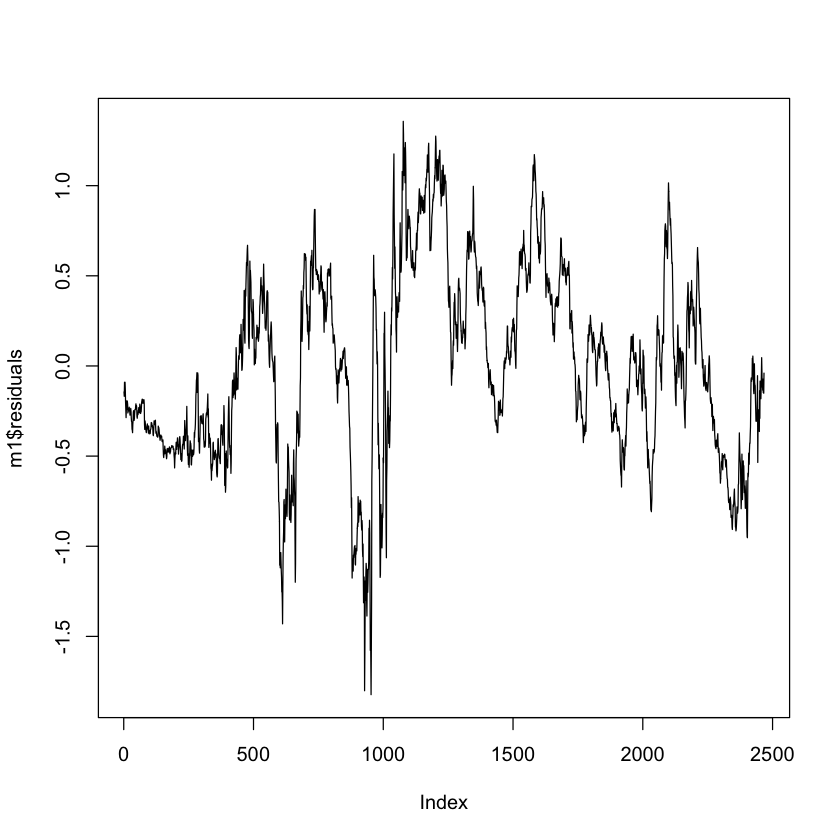


Call:
arima(x = c3, order = c(0, 0, 1), xreg = c1, include.mean = F)

Coefficients:
         ma1    xreg
      0.1823  0.7936
s.e.  0.0196  0.0075

sigma^2 estimated as 0.0046:  log likelihood = 3136.62,  aic = -6269.23

[1] 0.8310077

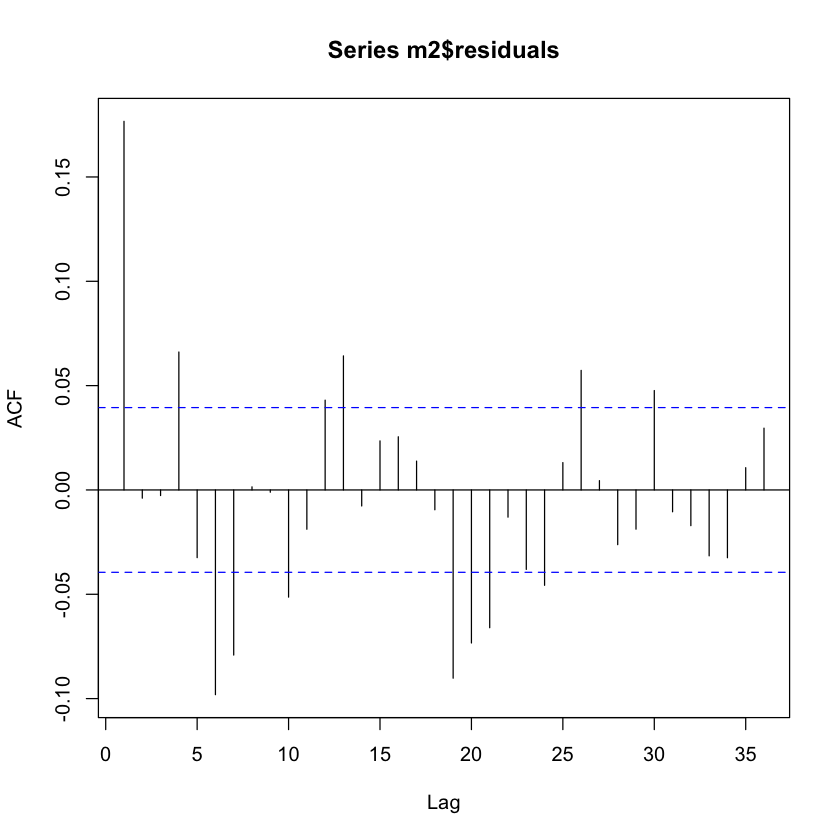

In [73]:
r1=read.table("ch2data/w-gs1yr.txt",header=T)[,4]
r3=read.table("ch2data/w-gs3yr.txt",header=T)[,4]
m1=lm(r3~r1)
summary(m1)
plot(m1$residuals,type='l')
c1=diff(r1)
c3=diff(r3)
m2=lm(c3~-1+c1)
summary(m2)
acf(m2$residuals,lag=36)
m3=arima(c3,order=c(0,0,1),xreg=c1,include.mean=F)
m3
rsq=(sum(c3^2)-sum(m3$residuals^2))/sum(c3^2)
rsq